<a href="https://colab.research.google.com/github/JayTheOpenSourcerer/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/LS_DS_433_Keras_Assignment_JM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 0us/step


In [2]:
import pandas as pd

x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
x_test = pd.DataFrame(x_test)
y_test = pd.DataFrame(y_test)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404, 1), (102, 13), (102, 1))

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train, y_train)
x_test = scaler.fit_transform(x_test, y_test)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

model = Sequential()
# input layer
model.add(Dense(1, input_dim=13, activation='sigmoid'))
# hidden layet
model.add(Dense(1, activation="sigmoid"))
#output layer
model.add(Dense(1, activation="linear"))

model.compile(loss='mean_squared_error', optimizer="adam")

W0719 01:26:18.927739 139707300788096 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
history = model.fit(x_train, y_train, epochs=500, verbose=0)

In [6]:
scores = model.evaluate(x_test, y_test)

102/102 [==============================] - 0s 335us/sample - loss: 203.6673


In [7]:
print(history.history.keys())

dict_keys(['loss'])


In [8]:
print(history.history['loss'][0:10])

[581.9947400990098, 580.9842783106436, 579.9646491626702, 578.9248814346766, 577.8880687751392, 576.8403870233215, 575.7704963306389, 574.7094224986464, 573.629204778388, 572.5504380027846]


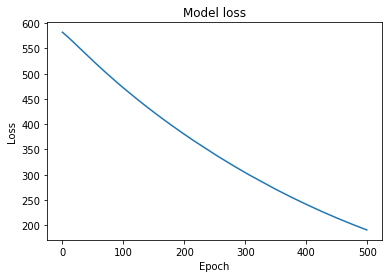

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)

mean_squared_error(y_test, y_pred)

40.60145446671504

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [11]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [12]:
X_train.shape

(60000, 28, 28)

In [0]:
# reshape
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [0]:
# set to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [0]:
# set outputs to categorical
import keras

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [16]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
mnist_model = Sequential()

# hidden layer
mnist_model.add(Dense(16, input_dim=784, activation='relu'))
mnist_model.add(Dense(16, activation='relu'))
# output layer
mnist_model.add(Dense(10, activation='softmax'))

mnist_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history = mnist_model.fit(X_train, y_train, batch_size=32, epochs=150, verbose=1)

Epoch 1/150
60000/60000 [==============================] - 3s 50us/sample - loss: 2.1891 - acc: 0.3080
Epoch 2/150
60000/60000 [==============================] - 3s 46us/sample - loss: 1.1980 - acc: 0.5321
Epoch 3/150
60000/60000 [==============================] - 3s 47us/sample - loss: 0.9175 - acc: 0.6533
Epoch 4/150
60000/60000 [==============================] - 3s 48us/sample - loss: 0.7223 - acc: 0.7536
Epoch 5/150
60000/60000 [==============================] - 3s 47us/sample - loss: 0.5569 - acc: 0.8428
Epoch 6/150
60000/60000 [==============================] - 3s 47us/sample - loss: 0.4936 - acc: 0.8629
Epoch 7/150
60000/60000 [==============================] - 3s 47us/sample - loss: 0.4596 - acc: 0.8713
Epoch 8/150
60000/60000 [==============================] - 3s 47us/sample - loss: 0.4236 - acc: 0.8799
Epoch 9/150
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3993 - acc: 0.8860
Epoch 10/150
60000/60000 [==============================] - 3s 47us/sampl

In [19]:
score = mnist_model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 27us/sample - loss: 0.3360 - acc: 0.9146


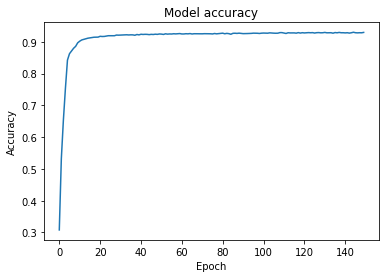

In [20]:
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

## Working on by hand model from yesterday's assignment

In [21]:
X_train[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [22]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
class NeuralNetwork:
    def __init__(self):
        # Set up Architecture of Neural Network
        self.input = 784
        self.hiddenNodes = 16
        self.outputNodes = 10
        
        # Initial Weights
        # 784x16 Matrix Array for the First Layer
        self.weights1 = np.random.randn(self.input,self.hiddenNodes)
        # 16x10 Matrix Array for Hidden to Output
        self.weights2 = np.random.randn(self.hiddenNodes, self.outputNodes)

In [24]:
nn = NeuralNetwork()

print("Layer 1 weights: \n", nn.weights1)
print("Layer 2 weights: \n", nn.weights2)

Layer 1 weights: 
 [[-0.55556551  1.34085863  2.30325428 ...  0.40213823  0.34037977
  -0.73682421]
 [ 1.5309029   2.00572164 -0.73580843 ... -1.06279847 -0.9489877
   0.08903057]
 [-0.95656342 -1.14884253  1.33715518 ... -0.28772795  0.17736455
   1.46530486]
 ...
 [ 1.2375037  -0.43499716 -0.66308861 ...  1.00149795 -0.74504202
   1.25030762]
 [-0.36719709  0.36561068  0.66473998 ... -0.72909737  0.72262694
  -0.26693736]
 [ 0.27073725 -0.53939845  0.46027791 ... -1.49810565  0.1943317
  -0.78177083]]
Layer 2 weights: 
 [[-0.26118615 -0.60550628 -0.19809427  0.47862116 -1.51514807 -1.65344064
   0.41024897  0.29685017 -0.35725428 -1.04867319]
 [ 0.43409623  0.05921039 -2.01137652  0.89125429 -1.69350264  0.86584317
  -1.69167661  1.39235737 -0.95856409 -0.23897538]
 [-0.50890673 -0.85884013 -0.64763916 -0.79694664  0.57240944 -1.25077051
  -1.11937665  0.21671291 -0.02838902 -0.53693663]
 [-0.34686957  1.02228941 -0.57329003 -0.16278701  0.04750091 -0.54913585
   1.81055887 -0.145725

In [0]:
class NeuralNetwork:
    def __init__(self):
        # Set up Architecture of Neural Network
        self.input = 784
        self.hiddenNodes = 16
        self.outputNodes = 10
        
        # Initial Weights
        #7843x16 Matrix Array for the First Layer
        self.weights1 = np.random.randn(self.input,self.hiddenNodes)
        # 16x10 Matrix Array for Hidden to Output
        self.weights2 = np.random.randn(self.hiddenNodes, self.outputNodes)
    
    def sigmoid(self, x):
        return 1 / (1+np.exp(-x))
    
    def feed_forward(self,X):
        """
        Calculate the NN inference using feed forward.
        """
        
        # Weighted sum of inputs & hidden
        self.hidden_sum = np.dot(X, self.weights1)
        
        # Activations of weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # Weighted sum between hidden and output
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        # Final Activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output

In [26]:
# generate an output

nn = NeuralNetwork()

print(X_train[0])
output = nn.feed_forward(X_train[0])
print("output", output)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


In [27]:
# calculate error

output_all = nn.feed_forward(X_train)
error_all = y_train - output_all
print(output_all)
print(error_all)

[[1.67138840e-03 3.27866636e-02 1.08754459e-01 ... 2.33880098e-01
  9.99431353e-01 2.28303412e-02]
 [2.49533585e-04 3.31742967e-02 9.48553199e-01 ... 3.74109616e-03
  7.23320150e-01 6.48038242e-04]
 [3.11223425e-02 6.08400613e-01 8.27272166e-01 ... 7.12863869e-02
  9.43368269e-01 6.92161087e-02]
 ...
 [1.48583663e-02 2.93735420e-01 2.56205796e-01 ... 2.84481760e-01
  9.88269085e-01 1.51431133e-02]
 [7.10926406e-03 1.66473882e-01 9.95963154e-01 ... 3.91633327e-03
  8.22250699e-01 6.64650980e-03]
 [9.72493677e-02 6.86913531e-01 9.74174958e-01 ... 4.83727527e-01
  4.61917650e-01 2.77725964e-01]]
[[-1.67138840e-03 -3.27866636e-02 -1.08754459e-01 ... -2.33880098e-01
  -9.99431353e-01 -2.28303412e-02]
 [ 9.99750466e-01 -3.31742967e-02 -9.48553199e-01 ... -3.74109616e-03
  -7.23320150e-01 -6.48038242e-04]
 [-3.11223425e-02 -6.08400613e-01 -8.27272166e-01 ... -7.12863869e-02
  -9.43368269e-01 -6.92161087e-02]
 ...
 [-1.48583663e-02 -2.93735420e-01 -2.56205796e-01 ... -2.84481760e-01
  -9.88269

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


In [0]:
class NeuralNetwork:
    def __init__(self):
        # Set up Architecture of Neural Network
        self.input = 784
        self.hiddenNodes = 16
        self.outputNodes = 10
        
        # Initial Weights
        # 3x4 Matrix Array for the First Layer
        self.weights1 = np.random.randn(self.input,self.hiddenNodes)
        # 4x1 Matrix Array for Hidden to Output
        self.weights2 = np.random.randn(self.hiddenNodes, self.outputNodes)
    
    def sigmoid(self, x):
        return 1 / (1+np.exp(-x))
    
    def sigmoidPrime(self, x):
        return x * (1 - x)
    
    def feed_forward(self,X):
        """
        Calculate the NN inference using feed forward.
        """
        
        # Weighted sum of inputs & hidden
        self.hidden_sum = np.dot(X, self.weights1)
        
        # Activations of weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # Weighted sum between hidden and output
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        # Final Activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
    
    def backward(self, X, y, o):
        """
        Backward propagate through the network
        """
        self.o_error = y - o #error in output
        self.o_delta = self.o_error * self.sigmoidPrime(o) # apply derivative of sigmoid to error
        
        self.z2_error = self.o_delta.dot(self.weights2.T) # z2 error: how much our hidden layer weights were off
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.activated_hidden)
        
        self.weights1 += X.T.dot(self.z2_delta) #Adjust first set (input => hidden) weights
        self.weights2 += self.activated_hidden.T.dot(self.o_delta) #adjust second set (hidden => output) weights
        
    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X, y, o)

In [0]:
nn = NeuralNetwork()

for i in range(1000):
    if ((i+1) % 100 ==0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
        print('Predicted Output: \n', str(nn.feed_forward(X_train)))
        print("Loss: \n", str(np.mean(np.square(y_train - nn.feed_forward(X_train)))))
    nn.train(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


+---------EPOCH 100---------+
Predicted Output: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Loss: 
 0.1
+---------EPOCH 200---------+
Predicted Output: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Loss: 
 0.1
+---------EPOCH 300---------+
Predicted Output: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Loss: 
 0.1
+---------EPOCH 400---------+
Predicted Output: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Loss: 
 0.1
+---------EPOCH 500---------+
Predicted Output: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ..

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.